In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.io as sio
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

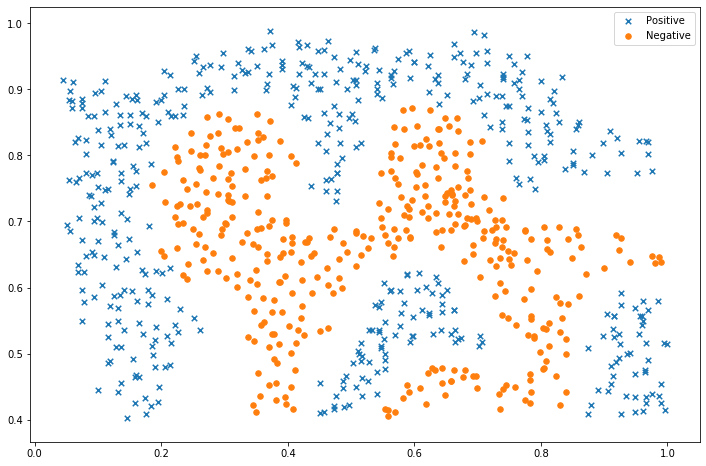

In [4]:
raw_data = sio.loadmat('ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2']], data["y"], test_size=0.2, random_state=4)

In [6]:
c = 10
gam = 10
k = 5
lfsz = 5
mxDepth = 2
mnSmplSplt = 2

svcLin = svm.SVC(kernel = "linear", C=c, max_iter=1000, probability=True)
svcRbf = svm.SVC(kernel = "rbf", C=c, max_iter=1000, gamma=gam, probability=True)
svcPol = svm.SVC(kernel = "poly", C=c, max_iter=1000, gamma=gam, probability=True)
knn = KNeighborsClassifier(n_neighbors=k, leaf_size=lfsz)
logreg = linear_model.LogisticRegression(C=c)
dTree = DecisionTreeClassifier(max_depth=mxDepth, min_samples_split=mnSmplSplt)
rndmFrst = RandomForestClassifier(max_depth=mxDepth, min_samples_split=mnSmplSplt)

classifiers = [svcLin, svcRbf, svcPol, knn, logreg, dTree, rndmFrst]

0.7753623188405797


C:\Users\Nidhal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


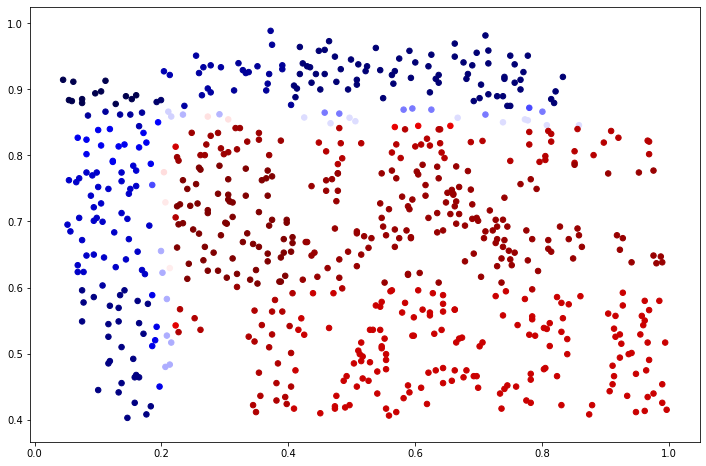

In [7]:
cls = rndmFrst

cls.fit(X_train, y_train)
print(cls.score(X_train, y_train))

probalitities = cls.predict_proba(X_train)[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_train["X1"], X_train['X2'], s=30, c=probalitities, cmap='seismic')

In [8]:
y_pred = cls.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7456647398843931


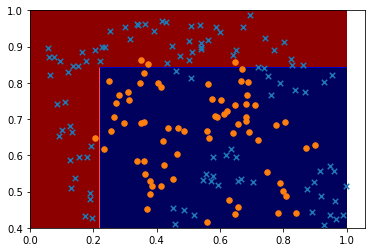

In [9]:
Nsmpl = 200
xplt, yplt = np.meshgrid(np.linspace(0, 1,Nsmpl), np.linspace(0.4,1,Nsmpl)) #X and Y axis and their limits
XX = np.array([xplt.ravel(), yplt.ravel()]).T

y_pred = cls.predict(XX)
y_pred = y_pred.reshape(xplt.shape[0], xplt.shape[0])
plt.contourf(xplt, yplt, y_pred, 20, cmap='seismic')

X_set = X_test
y_set = y_test
positive = X_set[y_set==1]
negative = X_set[y_set==0]
plt.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
plt.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')

plt.show()

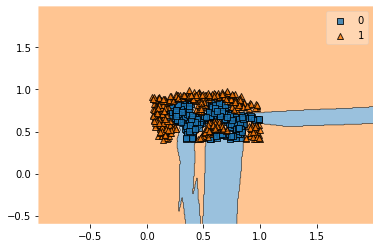

In [8]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_train.to_numpy(), y=y_train.to_numpy(), clf=cls, legend=1, 
                      #X_highlight=X_test.to_numpy()
                     )